In [2]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
from scipy import optimize
from scipy.optimize import curve_fit
import numpy as np

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


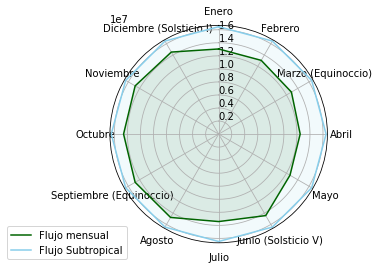

In [3]:
# Set data
df = pd.DataFrame({
'group': ['Flujo Mensual','Flujo Subtropical','C','D'],
'Enero': [13053590, 16474194, 30, 4],
'Febrero': [13053590, 16474194, 9, 34],
'Marzo (Equinoccio)': [12881163, 16474194, 23, 24],
'Abril': [12500206, 16474194, 33, 14],
'Mayo': [12627509, 16474194, 32, 14],
'Junio (Solsticio V)': [14433492, 16474194, 33, 14],
'Julio': [13415769, 16474194, 33, 14],
'Agosto': [14761016, 16474194, 33, 14],
'Septiembre (Equinoccio)': [14793501, 16474194, 33, 14],
'Octubre': [14586702, 16474194, 33, 14],
'Noviembre': [14790637, 16474194, 33, 14],
'Diciembre (Solsticio I)': [14523434, 16474194, 33, 14]
})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
#plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
#plt.ylim(0,40)
#CAMBIAJO POR JENNIFER PARA PRUEBAS


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, 'darkgreen',  label="Flujo mensual")
ax.fill(angles, values, 'darkgreen', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, 'skyblue', label="Flujo Subtropical")
ax.fill(angles, values, 'skyblue', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))




plt.savefig('flujo_circular.pdf')
plt.savefig('flujo_circular.png', format='png', dpi=600)
plt.savefig('flujo_circular.eps', format='eps', dpi=600)

In [4]:
#meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun","Jul", "Ag", "Sep", "Oct", "Nov","Dic"]
#meses =np.array([1,2,3,4,5,6,7,8,9,10,11,12])
meses = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
flujo_total = np.array([13053590,13053590,12881163,12500206,12627509,14433492,13415769,14761016,14793501,14586702,14790637,14523434,13053590])
#flujo_total = np.array([13453590,13053590,12881163,12500206,12627509,13233492,13615769,14361016,14793501,14886702,14790637,14523434,13453590])


In [5]:
np.random.seed(0)

meses = np.linspace(-5, 5, num=50)
flujo_total = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)
plt.figure(figsize=(6, 4))
plt.scatter(meses, flujo_total)

NameError: name 'x_data' is not defined

ValueError: x and y must have same first dimension, but have shapes (50,) and (13,)

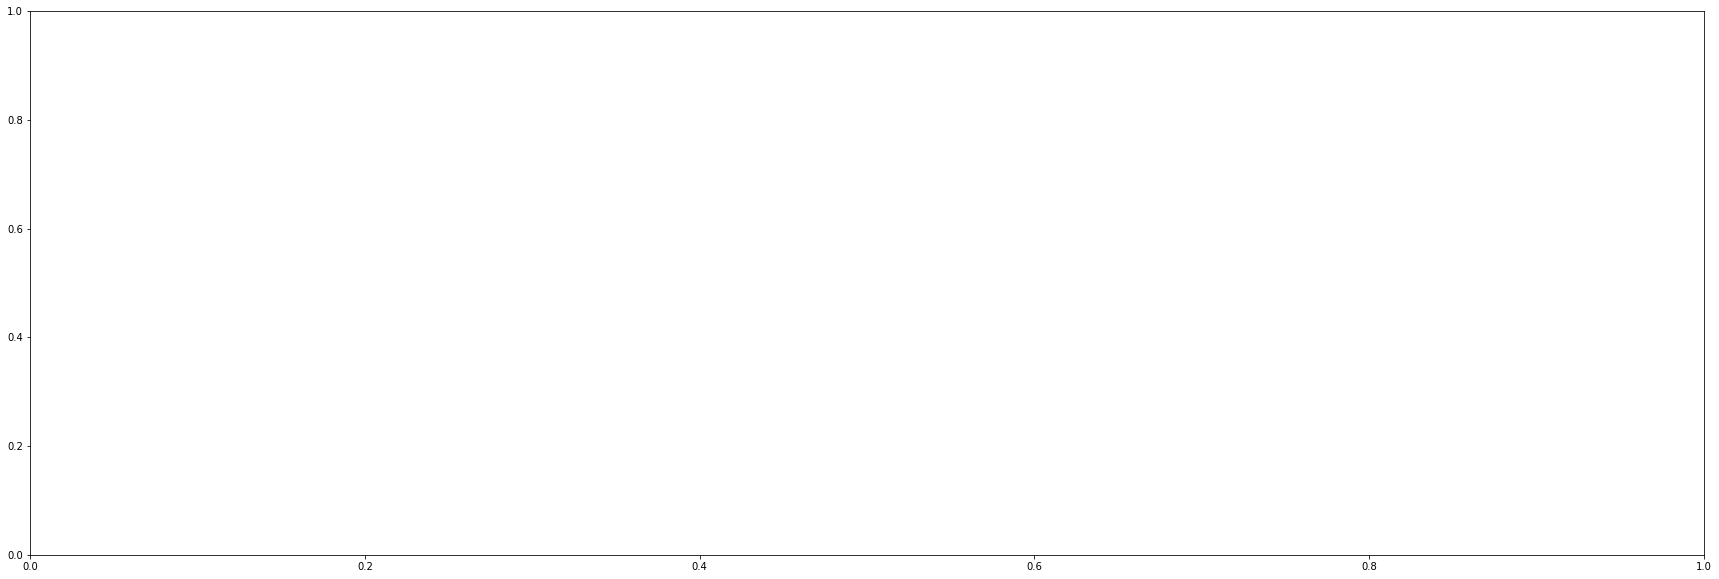

In [5]:
plt.figure(figsize=(30,10))
plt.plot(meses,flujo_total,'ob', markersize=20)
#plt.plot(meses,elec,'*b')
plt.legend(["Total"], fontsize=30)
plt.xlabel("Meses" , fontsize=30 )
plt.ylabel("Flux #/m^2*4h" , fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)


#plt.axvspan(0, 0.5, facecolor='white', alpha=0.5)
#plt.axvspan(0.5, 1.5, facecolor='whitesmoke', alpha=0.5)
#plt.axvspan(1.5, 2.5, facecolor='white', alpha=0.5)
#plt.axvspan(2.5, 3.5, facecolor='whitesmoke', alpha=0.5)
#plt.axvspan(3.5, 4.5, facecolor='white', alpha=0.5)
#plt.axvspan(4.5, 5.5, facecolor='whitesmoke', alpha=0.5)
#plt.axvspan(5.5, 6.5, facecolor='white', alpha=0.5)
#plt.axvspan(6.5, 7.5, facecolor='whitesmoke', alpha=0.5)
#plt.axvspan(7.5, 8.5, facecolor='white', alpha=0.5)
#plt.axvspan(8.5, 9.5, facecolor='whitesmoke', alpha=0.5)
#plt.axvspan(9.5, 10.5, facecolor='white', alpha=0.5)
#plt.axvspan(10.5, 11.5, facecolor='whitesmoke', alpha=0.5)



plt.savefig('flujo_mensual.pdf')
plt.savefig('flujo_mensual.png', format='png', dpi=600)
plt.savefig('flujo_mensual.eps', format='eps', dpi=600)



plt.show

In [138]:
def fit_flux(x, a, b, c, d):
    return a * (np.cos((b * x) + d))+c

params, params_covariance = optimize.curve_fit(fit_flux, meses, flujo_total)

print(params)

[-1.12122231e+06  5.78047568e+00  1.37421557e+07  2.67690968e+01]


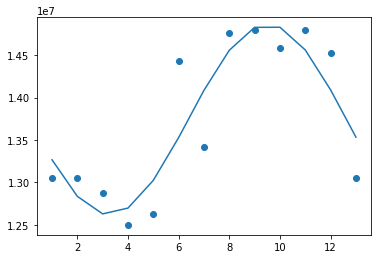

In [139]:
a = params[0]
b = params[1]
c = params[2]
#plt.figure(figsize=(6, 4))
plt.scatter(meses, flujo_total, label='Data')
plt.plot(meses, fit_flux(meses, params[0], params[1], params[2], params[3]))
#plt.legend(loc='best')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


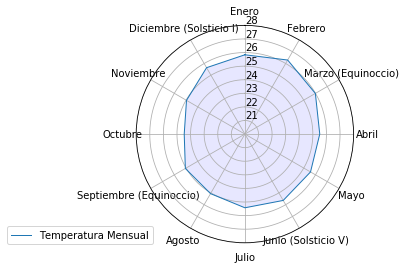

In [9]:
#Ahora vamos a graficar la temperatura mes a mes para comparar
# Set data
df = pd.DataFrame({
'group': ['Temperatura Mensual','Temperatura Promedio','C','D'],
'Enero': [25.83521505,29, 30, 4],
'Febrero': [26.2912202, 29, 9, 34],
'Marzo (Equinoccio)': [25.9858871, 29, 23, 24],
'Abril': [25.507083333, 29, 33, 14],
'Mayo': [25.57392473, 29, 32, 14],
'Junio (Solsticio V)': [25.63763889, 29, 33, 14],
'Julio': [25.42299013, 29, 33, 14],
'Agosto': [25.060008065, 28, 33, 14],
'Septiembre (Equinoccio)': [25.060008065, 29, 33, 14],
'Octubre': [24.46597938, 29, 33, 14],
'Noviembre': [24.961944444, 29, 33, 14],
'Diciembre (Solsticio I)': [25.6410498, 29, 33, 14]
})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
#plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(20,28)
#CAMBIAJO POR JENNIFER PARA PRUEBAS


# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Temperatura Mensual")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='', label="")
ax.fill(angles, values, 'w', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))




plt.savefig('temperatura.pdf')
plt.savefig('temperatura.png', format='png', dpi=600)
plt.savefig('temperatura.eps', format='eps', dpi=600)

In [8]:
#meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun","Jul", "Ago", "Sep", "Oct", "Nov","Dic"]
meses = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
total = np.array([25.83521505,26.2912202,25.9858871,25.50708333,25.57392473,25.63763889,25.42299013,25.060008065,25.060008065,24.46597938,24.961944444,25.6410498])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<function matplotlib.pyplot.show(*args, **kw)>

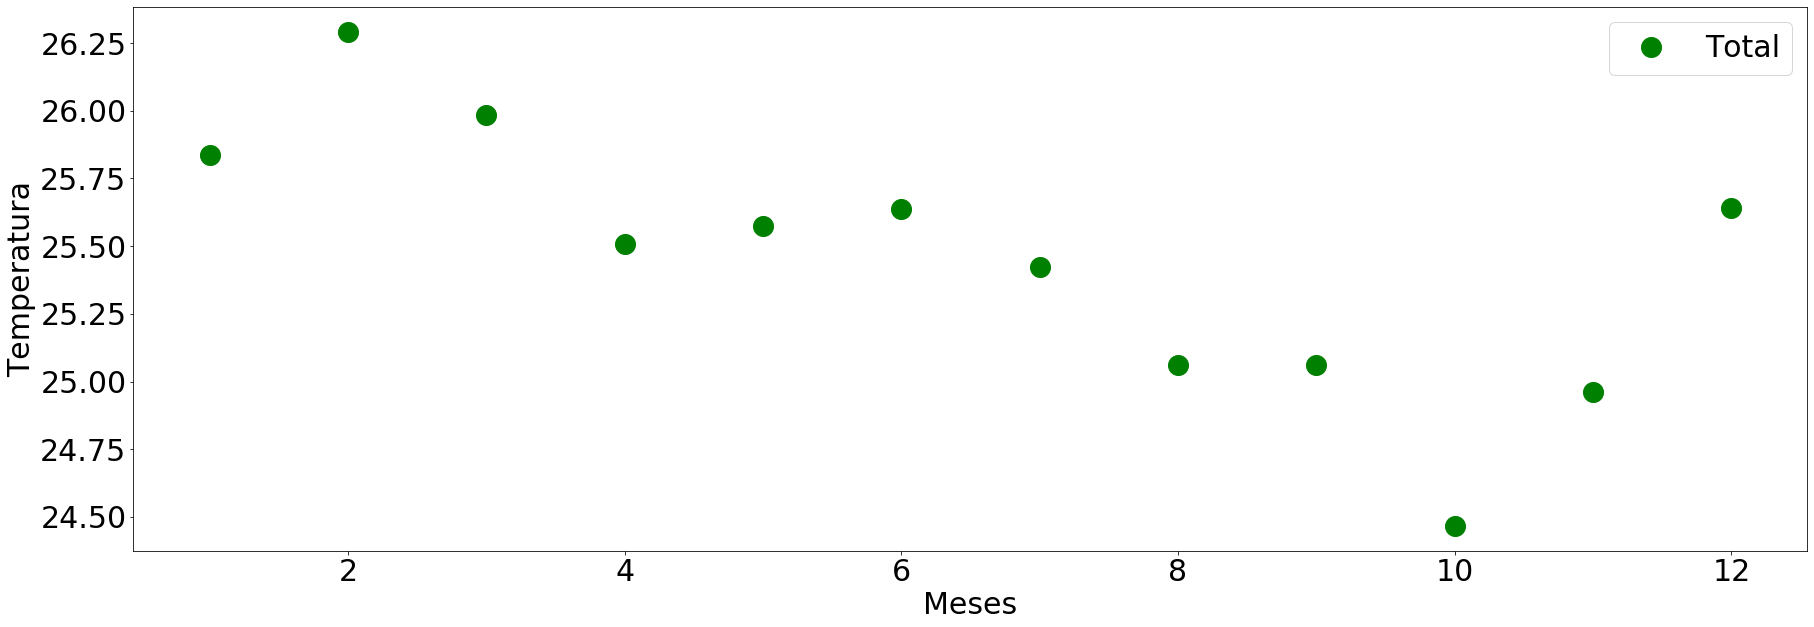

In [9]:
plt.figure(figsize=(30,10))
plt.plot(meses,total,'og', markersize=20)
#plt.plot(meses,elec,'*b')
plt.legend(["Total"], fontsize=30)
plt.xlabel("Meses" , fontsize=30 )
plt.ylabel("Temperatura" , fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)


#plt.axvspan(0, 0.5, facecolor='white', alpha=0.5)
#plt.axvspan(0.5, 1.5, facecolor='whitesmoke', alpha=0.5)
#plt.axvspan(1.5, 2.5, facecolor='white', alpha=0.5)
#plt.axvspan(2.5, 3.5, facecolor='whitesmoke', alpha=0.5)
#plt.axvspan(3.5, 4.5, facecolor='white', alpha=0.5)
#plt.axvspan(4.5, 5.5, facecolor='whitesmoke', alpha=0.5)
#plt.axvspan(5.5, 6.5, facecolor='white', alpha=0.5)
#plt.axvspan(6.5, 7.5, facecolor='whitesmoke', alpha=0.5)
#plt.axvspan(7.5, 8.5, facecolor='white', alpha=0.5)
#plt.axvspan(8.5, 9.5, facecolor='whitesmoke', alpha=0.5)
#plt.axvspan(9.5, 10.5, facecolor='white', alpha=0.5)
#plt.axvspan(10.5, 11.5, facecolor='whitesmoke', alpha=0.5)


plt.savefig('Temperatura_GL.pdf')
plt.savefig('Temperatura_GL.png', format='png', dpi=600)
plt.savefig('Temperatura_GL.eps', format='eps', dpi=600)



plt.show

In [159]:
def fit_temp(x, a, b, c, d):
    return a * (np.sin((b * x) + d))+c

params, params_covariance = optimize.curve_fit(fit_temp, meses, total,p0=[1,1,1,1])

print(params)

[ 0.37984148  1.17433896 25.42897151 -0.67706522]


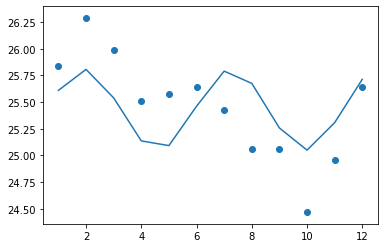

In [160]:
a = params[0]
b = params[1]
c = params[2]
#plt.figure(figsize=(6, 4))
plt.scatter(meses,total, label='Data')
plt.plot(meses, fit_temp(meses, params[0], params[1], params[2], params[3]))
#plt.legend(loc='best')
plt.show()

In [181]:
np.arccos(25.42897151)//6


/home/jennifer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


nan